In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Importing Dataset

In [2]:
data = pd.read_csv(r"E:\PROSCHOOL\Term 1\term 1 project\Healthcare\Dataset_spine.csv")
print('Shape of data: {}'.format(data.shape))
print("----"*30)
print("----"*30)
print('Columns of data: {}'.format(data.columns))
print("----"*30)
print("----"*30)
print('Structer of data:')
print(data.info())
print("----"*30)
print("----"*30)
print('Glimpse of data:')
print(data.head())
print("----"*30)
print("----"*30)

Shape of data: (310, 12)
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
Columns of data: Index([' pelvic_incidence  ', ' pelvic_tilt ', ' lumbar_lordosis_angle ',
       ' sacral_slope ', ' pelvic_radius ', ' degree_spondylolisthesis ',
       ' pelvic_slope', ' Direct_tilt', ' thoracic_slope', ' cervical_tilt',
       'sacrum_angle', ' scoliosis_slope'],
      dtype='object')
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
Structer of data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 12 columns):
 pelvic_incidence             310 non-null float64
 pelvic_t

Take a copy of data:

In [3]:
df = data.copy()

## Descriptive Analysis:

In [4]:
print(df.describe())

        pelvic_incidence     pelvic_tilt    lumbar_lordosis_angle   \
count           310.000000     310.000000               310.000000   
mean             60.496653      17.542822                51.930930   
std              17.236520      10.008330                18.554064   
min              26.147921      -6.554948                14.000000   
25%              46.430294      10.667069                37.000000   
50%              58.691038      16.357689                49.562398   
75%              72.877696      22.120395                63.000000   
max             129.834041      49.431864               125.742385   

        sacral_slope    pelvic_radius    degree_spondylolisthesis   \
count      310.000000       310.000000                  310.000000   
mean        42.953831       117.920655                   26.296694   
std         13.423102        13.317377                   37.559027   
min         13.366931        70.082575                  -11.058179   
25%         33.3471

## Exploratory Data Analysis of Featues

### Histogram and Density plot

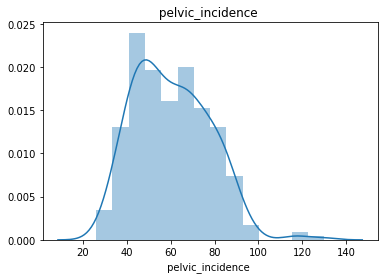

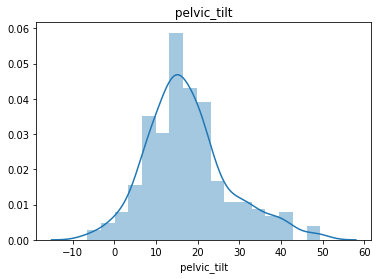

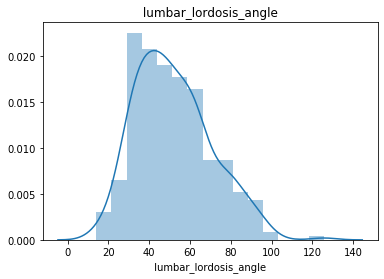

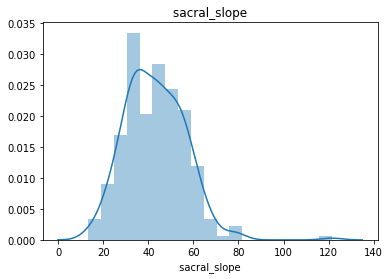

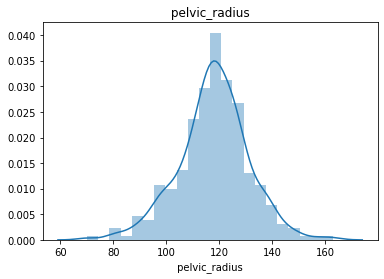

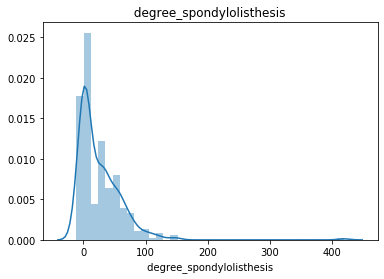

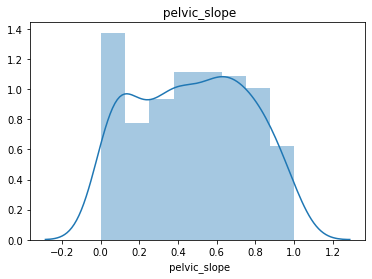

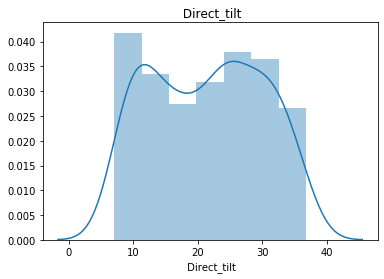

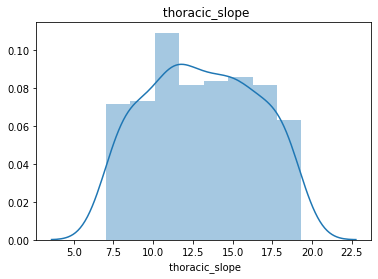

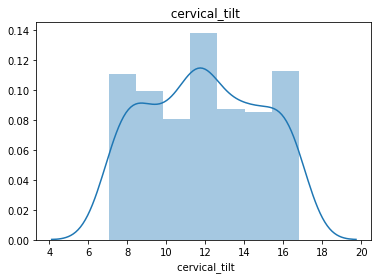

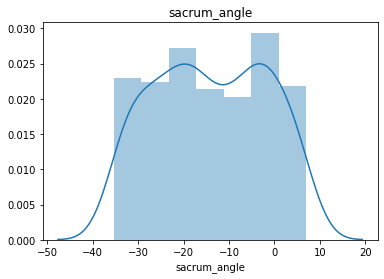

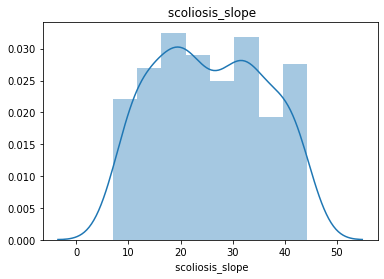

In [5]:
for i in df.columns:
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

### Boxplot

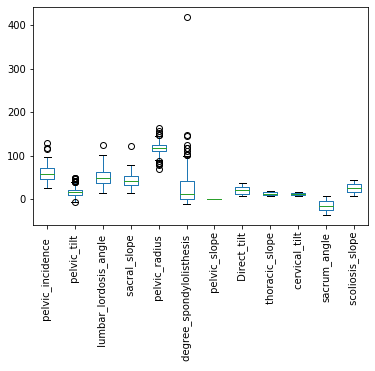

In [6]:
df.plot.box()
plt.xticks(rotation= 90)
plt.show()

### Pairplot

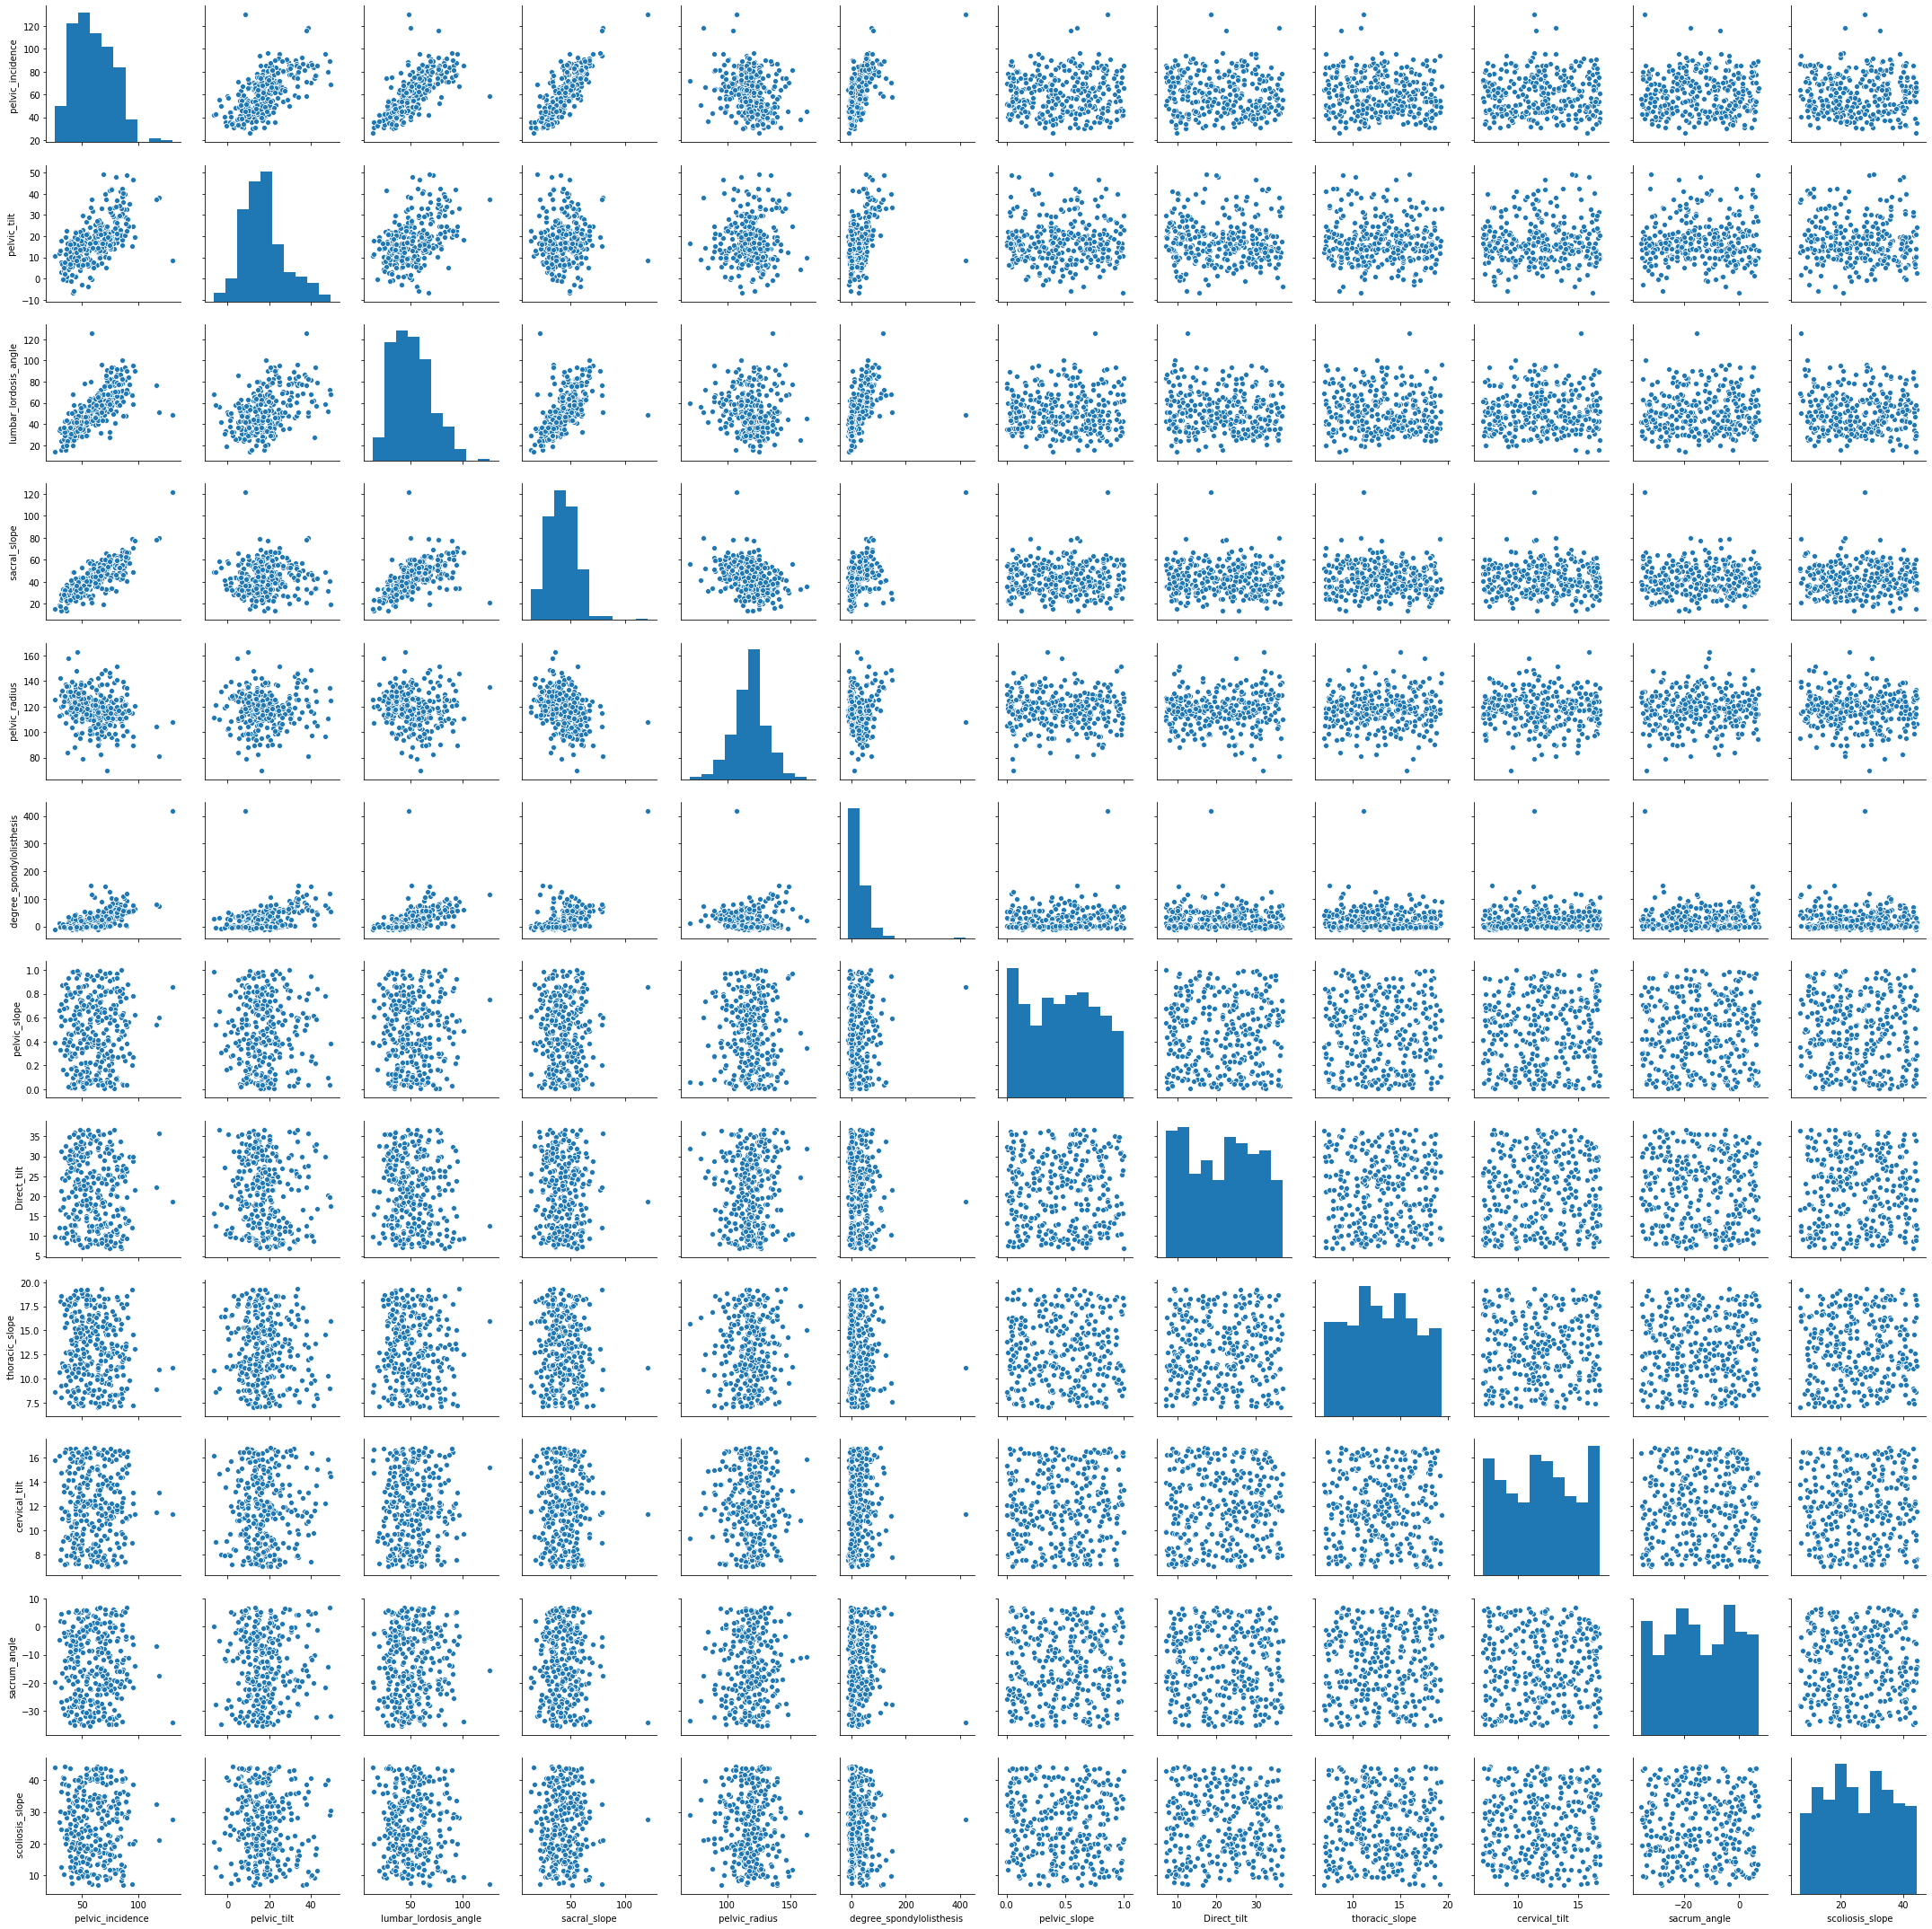

In [7]:
sns.pairplot(df)
plt.show()

## Standardizing values

In [8]:
df_scaled = StandardScaler().fit_transform(df)

## Dimensionality Reduction

In [9]:
pca = PCA(n_components=12, random_state=100)
pca.fit(df_scaled)
var = pca.explained_variance_ratio_
print(var)

[2.73268040e-01 1.03795106e-01 9.52503694e-02 8.79621330e-02
 8.53277659e-02 8.06383488e-02 7.44195286e-02 7.36974061e-02
 6.05558480e-02 3.89978884e-02 2.60875663e-02 3.05666911e-21]


### variabtion explaned by each component

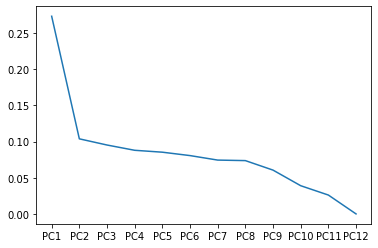

In [10]:
col_name = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10','PC11', 'PC12']
plt.plot(col_name,var)
plt.show()

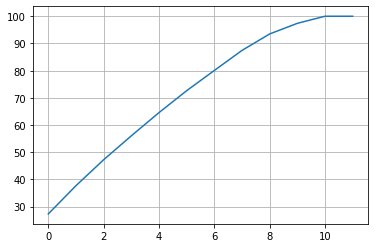

In [11]:
var1= np.cumsum(np.round(var,4)*100)
plt.plot(var1)
plt.grid()

100% variance is explain by 10 variables

### Principal component dataframe

In [12]:
principal_components=pca.fit_transform(df_scaled)
princ_comp_df = pd.DataFrame(data = principal_components, columns=col_name)
print(princ_comp_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.174284 -1.208808  0.984397 -0.796289  0.233878  0.124832  2.447052   
1 -2.210186  0.075289  0.815071 -0.056396  0.376336  1.653561  1.379787   
2  0.170257 -0.181279  1.289299  0.715560  1.471898  1.079058  0.756172   
3  0.316767 -0.852278 -0.464238  1.221400  0.466441  0.399932  0.430832   
4 -1.573705 -0.770620  0.512878  0.933144  0.557221  0.453095 -1.205055   

        PC8       PC9      PC10      PC11          PC12  
0  0.065765 -1.389382 -0.103074 -0.314809 -3.426673e-11  
1 -1.448222  0.328874  0.603445 -0.278021  1.920048e-11  
2 -1.127879 -0.762741 -0.616817 -0.519912  2.340146e-11  
3 -0.782100 -1.090199 -0.010709 -0.389510 -3.987570e-10  
4  0.842215 -0.993369  0.490473 -0.082999  5.600284e-11  


In [13]:
new_df = princ_comp_df.drop(['PC11', 'PC12'], axis = 1)
print(new_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.174284 -1.208808  0.984397 -0.796289  0.233878  0.124832  2.447052   
1 -2.210186  0.075289  0.815071 -0.056396  0.376336  1.653561  1.379787   
2  0.170257 -0.181279  1.289299  0.715560  1.471898  1.079058  0.756172   
3  0.316767 -0.852278 -0.464238  1.221400  0.466441  0.399932  0.430832   
4 -1.573705 -0.770620  0.512878  0.933144  0.557221  0.453095 -1.205055   

        PC8       PC9      PC10  
0  0.065765 -1.389382 -0.103074  
1 -1.448222  0.328874  0.603445  
2 -1.127879 -0.762741 -0.616817  
3 -0.782100 -1.090199 -0.010709  
4  0.842215 -0.993369  0.490473  


## Building a Model

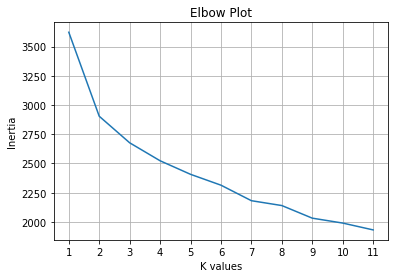

In [14]:
x = new_df.values
k = range(1,12)
inertia = []
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(x)
    inertia.append(model.inertia_)

plt.plot(k, inertia)
plt.ylabel('Inertia')
plt.xlabel('K values')
plt.xticks(k)
plt.grid()
plt.title('Elbow Plot')
plt.show()

Inertia reduces slowly after 2 clusters

### Final Model

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0]


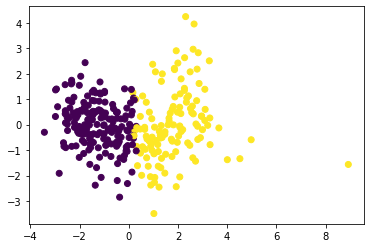

In [15]:
model = KMeans(n_clusters=2)
model.fit(x)
labels = model.predict(x)
print(labels)
x1 = x[:,0]
y1 = x[:,1]
plt.scatter(x1,y1, c = labels)

In [17]:
data['cluster']=labels

In [20]:
data.to_csv('submission.csv')